# ![1.jpg](attachment:1.jpg)

# <center> House Price Predictions with XGboost Regression and Linear Regression <center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Predicting-House-Sales-Prices" data-toc-modified-id="Predicting-House-Sales-Prices-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting House Sales Prices</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regression" data-toc-modified-id="XGBoost-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>XGBoost Regression</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

In this Notebook, we will work on a dataset that contains house sale prices for King County in Seattle. It includes homes sold between May 2014 and May 2015. It is a great dataset for evaluating regression models.

Here, we will use two different regression methods and try to predict the house prices by using them.
First, we will implement XGBoost as an ensemble learning algorithm to predict the the house prices. Afterwards, we will build a model by Linear Regression. Finally, we will compare the results of these two models to find the best model.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

## Loading Dataset

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print(df.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


We only have the date column which is a timestamp. So we will remove it.

In [ ]:
df.drop(['date'], axis=1, inplace=True)

In [ ]:
100*(df.isnull().sum())/(df.shape[0])

,0
id,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


The data set is pretty much structured and does not have any NaN values. So we do not need Data Cleaning.

## Exploratory Data Analysis

We find correlations between the features and the target variable.

In [ ]:
df.corr()['price'].sort_values(ascending=False).drop('price')

,price
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003
waterfront,0.266369


In [ ]:
cor=df.corr()['price'].sort_values(ascending=False).drop('price')

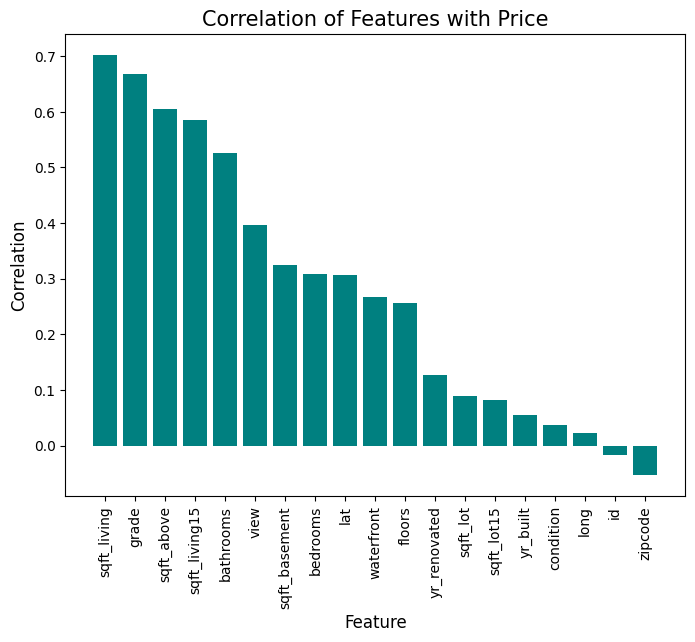

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

## Predicting House Sales Prices

In [ ]:
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y=df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### XGBoost Regression

In [ ]:
xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

**Parameter Details**
n_estimators=100:

The number of boosting rounds or trees to be built by the model. Each tree is added sequentially to improve the prediction performance of the model.
In this case, 100 trees will be built.
learning_rate=0.08 (also known as eta):

The step size used to update the weights after each boosting round.
A smaller learning rate makes the model learn more slowly and helps prevent overfitting. However, it typically requires more trees (n_estimators) to achieve good performance.
In this case, a learning rate of 0.08 means that each tree's contribution is scaled down by this factor.
gamma=0:

The minimum loss reduction required to make a further partition on a leaf node of the tree.
A larger gamma value means that the algorithm needs a larger reduction in loss to split a node, which makes the algorithm more conservative.
Since gamma=0 here, no minimum loss reduction is enforced, allowing for more tree splits if they provide even a slight improvement in reducing the loss.
subsample=0.75:

The fraction of the training data to be randomly sampled for growing each tree.
It helps prevent overfitting by ensuring that each tree is trained on a slightly different subset of the data.
Here, 0.75 means 75% of the training data is used for each tree.
colsample_bytree=1:

The fraction of features to be randomly sampled for each tree.
A value of 1 means all features are used for each tree. Reducing this value can help reduce overfitting and improve model performance by adding randomness to the model.
In this case, all features are used for building each tree.
max_depth=7:

The maximum depth of each tree.
Increasing max_depth makes the model more complex and capable of capturing more intricate patterns in the data but may lead to overfitting.
Here, max_depth=7 means that each tree can have up to 7 levels of splits.


In [ ]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction_xgbr=xgbr.predict(X_test)

In [ ]:
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,prediction_xgbr))

RMSE_XGBoost Regression= 119646.27954317744
R2 Score_XGBoost Regression= 0.8950738216662107


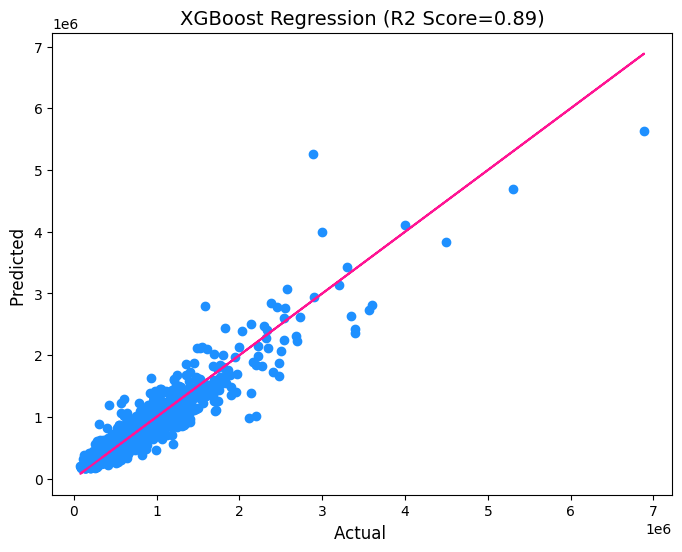

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual ',fontsize=12)
plt.ylabel('Predicted ',fontsize=12)
plt.title('XGBoost Regression (R2 Score=0.89)',fontsize=14)
plt.show()

### Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions_lr=lr.predict(X_test)

In [ ]:
print('RMSE_Linear Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_lr)))
print('R2 Score_Linear Regression=',metrics.r2_score(y_test,predictions_lr))

RMSE_Linear Regression= 200376.7994195374
R2 Score_Linear Regression= 0.7057067312350422


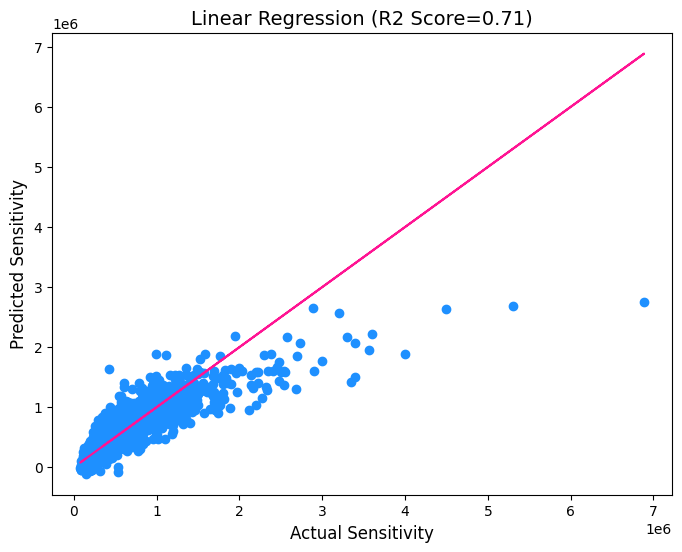

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_lr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('Linear Regression (R2 Score=0.71)',fontsize=14)
plt.show()

We can see that for XGBoost, the R2 score is higher and RMSE is lower than those of Linear Regression.

## Conclusion

Here we worked on house sale prices dataset and implemented regression models to predict the house prices.


- We implemented XGBoost as an ensemble learning algorithm and obtained RMSE and R2 Score of 120964.3 and 0.89, respectively.


- We built a model by Linear Regression and obtained RMSE and R2 Score of 200376.8 and 0.71, respectively.


- We concluded that XGBoost regression model was more successful in predicting the house prices.